# Importing Libraries

In [ ]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *

In [ ]:
fastbook.setup_book()

In [ ]:
import fastai
from fastai import *
from fastai.vision.all import *

# Downloading and Extracting Data from Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle'

In [ ]:
os.mkdir("EMNIST")

In [ ]:
os.chdir("/content/EMNIST")

In [ ]:
!kaggle datasets download -d crawford/emnist

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/MyDrive/kaggle. Or use the environment method.


In [ ]:
!unzip "/content/EMNIST/emnist.zip"

Archive:  /content/EMNIST/emnist.zip
  inflating: emnist-balanced-mapping.txt  
  inflating: emnist-balanced-test.csv  
  inflating: emnist-balanced-train.csv  
  inflating: emnist-byclass-mapping.txt  
  inflating: emnist-byclass-test.csv  
  inflating: emnist-byclass-train.csv  
  inflating: emnist-bymerge-mapping.txt  
  inflating: emnist-bymerge-test.csv  
  inflating: emnist-bymerge-train.csv  
  inflating: emnist-digits-mapping.txt  
  inflating: emnist-digits-test.csv  
  inflating: emnist-digits-train.csv  
  inflating: emnist-letters-mapping.txt  
  inflating: emnist-letters-test.csv  
  inflating: emnist-letters-train.csv  
  inflating: emnist-mnist-mapping.txt  
  inflating: emnist-mnist-test.csv   
  inflating: emnist-mnist-train.csv  
  inflating: emnist_source_files/emnist-balanced-test-images-idx3-ubyte  
  inflating: emnist_source_files/emnist-balanced-test-labels-idx1-ubyte  
  inflating: emnist_source_files/emnist-balanced-train-images-idx3-ubyte  
  inflating: emnist

# Imporing data and Preprocessing


In [ ]:
train_df=pd.read_csv("/content/EMNIST/emnist-balanced-train.csv")
test_df=pd.read_csv("/content/EMNIST/emnist-balanced-test.csv")
train_df.shape,test_df.shape

FileNotFoundError: ignored

In [ ]:
train_df.head()

NameError: ignored

In [ ]:
test_df.head()

41  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  0.11  0.12  0.13  \
0  39  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
1   9  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
2  26  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
3  44  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
4  33  0    0    0    0    0    0    0    0    0    0     0     0     0     0   

   0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  0.24  0.25  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  0.36  0.37  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  0.49  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.60  0.61  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.70  0.71  0.72  0.73  \
0     0     0     0     0     0     0     1    20    37    37    37    37   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.74  0.75  0.76  0.77  0.78  0.79  0.80  0.81  0.82  0.83  0.84  0.85  \
0    32     7     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     7    27     5     0     0     0     0   

   0.86  0.87  0.88  0.89  0.90  0.91  0.92  0.93  0.94  0.95  0.96  0.97  \
0     0     0     0     0     0     0     0     0     0     3    36   158   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     3     0     0     0     0     0     0     0     0     0   

   0.98  0.99  0.100  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  \
0   215   217    217    217    202     95     22      5      4      0      0   
1     0     0      0      0      0      0      0      0      0      0      0   
2     0     0      0      0      0 

In [ ]:
names=["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I",
       "J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","a","b",
      "d","e","f","g","h","n","q","r","t"]

In [ ]:
for i in range(len(train_df["45"].unique())):
    print(i)
    train_df.update(train_df.loc[np.where(train_df["45"]==i)]["45"].replace(i,names[i]))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


In [ ]:
for i in range(len(test_df["41"].unique())):
    print(i)
    test_df.update(test_df.loc[np.where(test_df["41"]==i)]["41"].replace(i,names[i]))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


In [ ]:
test_df["41"].unique()

In [ ]:
train_df["45"].unique()

array(['a', 'n', 'F', '4', 'h', 'Q', 'W', 'K', '1', 't', 'D', 'O', 'C', '5', 'H', '3', 'f', 'E', 'q', 'J', 'T', 'P', 'Z', 'S', 'N', 'M', 'Y', '9', 'U', 'd', 'e', 'b', 'V', 'G', '7', '2', '8', 'A',
       '6', 'R', 'r', 'X', 'B', 'I', 'g', '0', 'L'], dtype=object)

In [ ]:
len(test_df["41"].unique()),len(train_df["45"].unique())

In [ ]:
test_df.head()

In [ ]:
train_df.head()

45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  0.11  0.12  0.13  \
0  a  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
1  n  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
2  F  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
3  4  0    0    0    0    0    0    0    0    0    0     0     0     0     0   
4  h  0    0    0    0    0    0    0    0    0    0     0     0     0     0   

   0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  0.24  0.25  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  0.36  0.37  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  0.49  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     4     4     3     3     3     4   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.60  0.61  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     4     4     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.62  1   7  32  36  21   3  0.63  0.64  0.65  0.66  0.67  0.68  0.69  \
0     0  0   0   0   0   0   0     0     0     0     0     0     0     0   
1     2  9  32  37  37  37  37    37    37    51   114   125    95   104   
2     0  0   0   0   0   0   0     0     0     0     0     0     0     0   
3     0  0   0   0   0   0   0     0     0     0     0     0     0     0   
4     0  0   0   0   0   0   0     0     0     0     0     0     0     0   

   0.70  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.80  0.81  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1    95   125   127   114    45     5     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0.82  0.83  0.84    8   33  113  124   81   22  7.1  0.85  0.86  0.87  \
0     0     0     0    0    0    0    0    0    0    0     0     0     0   
1     4    22    82  139  204  217  217  217  217  217   217   222   245   
2     0     0     0    0    0    0    0    0    0    0     0     0     0   
3     0     0     0    0    0    0    0    0    0    0     0     0     0   
4     0     0     0    0    0    0    0    0    0    0     0     0     0   

   0.88  0.89  0.90  0.91  0.92  0.93  0.94  0.95  0.96  0.97  0.98  0.99  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1   249   238   241   238   249   250   245   189    32     0     0     0   
2     0     0     0     0     0     0     0     0     0     0

# Saving processed data as pickel

In [ ]:
path=Path("/content/EMNIST")
save_pickle(path/"processed_test_df.pkl",test_df)

NameError: ignored

In [ ]:
path=Path("/content/EMNIST")
save_pickle(path/"processed_train_df.pkl",train_df)

# Loading data from pickel File

In [ ]:
train_df=load_pickle("/content/gdrive/MyDrive/EMNIST project/processed_train_df.pkl")
train_df.sort_values(by=["45"],inplace=True)
train_df.head()

45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  0.11  0.12  \
86786  0  0    0    0    0    0    0    0    0    0    0     0     0     0   
49573  0  0    0    0    0    0    0    0    0    0    0     0     0     0   
66996  0  0    0    0    0    0    0    0    0    0    0     0     0     0   
67045  0  0    0    0    0    0    0    0    0    0    0     0     0     0   
79001  0  0    0    0    0    0    0    0    0    0    0     0     0     0   

       0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  0.24  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  0.36  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     1     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.49  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.60  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.61  0.62  1  7  32  36  21  3  0.63  0.64  0.65  0.66  0.67  0.68  \
86786     0     0  0  0   0   0   0  0     0     0     0     1     0     0   
49573     0     0  0  0   0   0   0  0     0     0     2     4     4     4   
66996     0     0  0  0   0   0   0  0     0     0     0     0     0     0   
67045     0     0  0  0   0   0   0  0     0     0     0     1    31    11   
79001     0     0  0  0   0   0   0  0     0     0     0     8    21    37   

       0.69  0.70  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.80  \
86786     4     4     4     2     0     0     0     0     0     0     0     0   
49573     4     2     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001    37    37    20     7     0     0     0     0     0     0     0     0   

       0.81  0.82  0.83  0.84  8  33  113  124  81  22  7.1  0.85  0.86  0.87  \
86786     0     0     0     0  0   0    0    0   0   0    0     0     8    59   
49573     0     0     0     0  0   0    0    0   0   0    8    22    82   114   
66996     0     0     0     0  0   0    0    0   0   0    0     0     0     0   
67045     0     0     0     0  0   0    0    0   0   0    0     0     0     0   
79001     0     0     0     0  0   0    0    0   0   0    2     3     9    46   

       0.88  0.89  0.90  0.91  0.92  0.93  0.94  0.95  0.96  0.97  0.98  0.99  \
86786    21    34   113   127   125    77     8     0     0     0

In [ ]:
test_df=load_pickle("/content/gdrive/MyDrive/EMNIST project/processed_test_df.pkl")
test_df.sort_values(by=["41"],inplace=True)
test_df.head()

41  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  0.11  0.12  \
10484  0  0    0    0    0    0    0    0    0    0    0     0     0     0   
7895   0  0    0    0    0    0    0    0    0    0    0     0     0     0   
14637  0  0    0    0    0    0    0    0    0    0    0     0     0     0   
10815  0  0    0    0    0    0    0    0    0    0    0     0     0     0   
18317  0  0    0    0    0    0    0    0    0    0    0     0     0     0   

       0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  0.24  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   

       0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  0.36  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   

       0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   

       0.49  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.60  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   

       0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.70  0.71  0.72  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     2     4   
18317     0     0     0     0     0     0     0     0     0     0     0     8   

       0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.80  0.81  0.82  0.83  0.84  \
10484     4     9    20    19     1     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815    21    36    32     9     4     2     0     0     0     0     0     0   
18317    32    37    37    37    32     7     0     0     0     0     0     0   

       0.85  0.86  0.87  0.88  0.89  0.90  0.91  0.92  0.93  0.94  0.95  0.96  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   

       0.97  0.98  0.99  0.100  0.101  0.102  0.103  0.104  0.105  0.106  \
10484     4     9    32     51    114    140    171 

In [ ]:
train_df.insert(1,"is_valid",0)
test_df.insert(1,"is_valid",1)

In [ ]:
train_df

45  is_valid  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  \
86786  0         0  0    0    0    0    0    0    0    0    0    0     0   
49573  0         0  0    0    0    0    0    0    0    0    0    0     0   
66996  0         0  0    0    0    0    0    0    0    0    0    0     0   
67045  0         0  0    0    0    0    0    0    0    0    0    0     0   
79001  0         0  0    0    0    0    0    0    0    0    0    0     0   
...   ..       ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
26775  t         0  0    0    0    0    0    0    0    0    0    0     0   
32616  t         0  0    0    0    0    0    0    0    0    0    0     0   
53216  t         0  0    0    0    0    0    0    0    0    0    0     0   
64502  t         0  0    0    0    0    0    0    0    0    0    0     0   
17581  t         0  0    0    0    0    0    0    0    0    0    0     0   

       0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
26775     0     0     0     0     0     0     0     0     0     0     0     0   
32616     0     0     0     0     0     0     0     0     0     0     0     0   
53216     0     0     0     0     0     0     0     0     0     0     0     0   
64502     0     0     0     0     0     0     0     0     0     0     0     0   
17581     0     0     0     0     0     0     0     0     0     0     0     0   

       0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
26775     0     0     0     0     0     0     0     0     0     0     0     0   
32616     0     0     0     0     0     0     0     0     0     0     0     0   
53216     0     0     0     0     0     0     0     0     0     0     0     0   
64502     0     0     0     0     0     0     0     0     0     0     0     0   
17581     0     0     0     0     0     0     0     0     0     0     0     0   

       0.35  0.36  0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     1     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
26775     0     0     3     4     3     0     0     0     0     0     0     0   
32616     0     0     0     0     3     0     0     0     0     0     0     0   
53216     0     0     0     0     0     0     0     0     0     0     0     0   
64502     0     0     0     0     0     0     0     0     0     0     0     0   
17581     0     0     0     0     0     0     0     0     0     0     0     0   

       0.47  0.48  0.49  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0 

In [ ]:
test_df

41  is_valid  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  \
10484  0         1  0    0    0    0    0    0    0    0    0    0     0   
7895   0         1  0    0    0    0    0    0    0    0    0    0     0   
14637  0         1  0    0    0    0    0    0    0    0    0    0     0   
10815  0         1  0    0    0    0    0    0    0    0    0    0     0   
18317  0         1  0    0    0    0    0    0    0    0    0    0     0   
...   ..       ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
1414   t         1  0    0    0    0    0    0    0    0    0    0     0   
17754  t         1  0    0    0    0    0    0    0    0    0    0     0   
8901   t         1  0    0    0    0    0    0    0    0    0    0     0   
5249   t         1  0    0    0    0    0    0    0    0    0    0     0   
13430  t         1  0    0    0    0    0    0    0    0    0    0     0   

       0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1414      0     0     0     0     0     0     0     0     0     0     0     0   
17754     0     0     0     0     0     0     0     0     0     0     0     0   
8901      0     0     0     0     0     0     0     0     0     0     0     0   
5249      0     0     0     0     0     0     0     0     0     0     0     0   
13430     0     0     0     0     0     0     0     0     0     0     0     0   

       0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1414      0     0     0     0     0     0     0     0     0     0     0     0   
17754     0     0     0     0     0     0     0     0     0     0     0     0   
8901      0     0     0     0     0     0     0     0     0     0     0     0   
5249      0     0     0     0     0     0     0     0     0     0     0     0   
13430     0     0     0     0     0     0     0     0     0     0     0     0   

       0.35  0.36  0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0     0     0     0     0     0     0     0     0     0     0     0   
14637     0     0     0     0     0     0     0     0     0     0     0     0   
10815     0     0     0     0     0     0     0     0     0     0     0     0   
18317     0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1414      0     0     0     0     0     0     0     0     0     0     0     0   
17754     0     0     0     0     0     0     0     0     0     0     0     0   
8901      0     0     0     0     0     0     0     0     0     0     0     0   
5249      0     0     0     0     0     0     0     0     0     0     0     0   
13430     0     0     0     0     0     0     0     0     0     0     0     0   

       0.47  0.48  0.49  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  \
10484     0     0     0     0     0     0     0     0     0     0     0     0   
7895      0 

In [ ]:
train_df.rename(columns={'45': 'Class'},inplace=True)
test_df.rename(columns={'41': 'Class'},inplace=True)

In [ ]:
df=pd.concat([train_df,test_df],axis=0)
df.head(5)

Class  is_valid  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  \
86786     0         0  0    0    0    0    0    0    0    0    0    0     0   
49573     0         0  0    0    0    0    0    0    0    0    0    0     0   
66996     0         0  0    0    0    0    0    0    0    0    0    0     0   
67045     0         0  0    0    0    0    0    0    0    0    0    0     0   
79001     0         0  0    0    0    0    0    0    0    0    0    0     0   

       0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.35  0.36  0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     1     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.47  0.48  0.49  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  \
86786     0     0     0     0     0     0     0     0     0     0     0     0   
49573     0     0     0     0     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045     0     0     0     0     0     0     0     0     0     0     0     0   
79001     0     0     0     0     0     0     0     0     0     0     0     0   

       0.59  0.60  0.61  0.62  1  7  32  36  21  3  0.63  0.64  0.65  0.66  \
86786     0     0     0     0  0  0   0   0   0  0     0     0     0     1   
49573     0     0     0     0  0  0   0   0   0  0     0     0     2     4   
66996     0     0     0     0  0  0   0   0   0  0     0     0     0     0   
67045     0     0     0     0  0  0   0   0   0  0     0     0     0     1   
79001     0     0     0     0  0  0   0   0   0  0     0     0     0     8   

       0.67  0.68  0.69  0.70  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  \
86786     0     0     4     4     4     2     0     0     0     0     0     0   
49573     4     4     4     2     0     0     0     0     0     0     0     0   
66996     0     0     0     0     0     0     0     0     0     0     0     0   
67045    31    11     0     0     0     0     0     0     0     0     0     0   
79001    21    37    37    37    20     7     0     0     0     0     0     0   

       0.79  0.80  0.81  0.82  0.83  0.84  8  33  113  124   81   22  7.1  \
86786     0     0     0     0     0     0  0   0    0  0.0  0.0  0.0    0   
49573     0     0     0     0     0     0  0   0    0  0.0  0.0  0.0    8   
66996     0     0     0     0     0     0  0   0    0  0.0  0.0  0.0    0   
67045     0     0     0     0     0     0  0   0    0  0.0  0.0  0.0    0   
79001     0     0     0     0     0     0  0   0    0  0.0  0.0  0.0    2   

       0.85  0.86  0.87  0.88  0.89  0.90  0.91  0.92  0.93  0.94  0.95  0.96  \
86786     0     8    59    21    34   113   127   125    77     8     0     0   
49

In [ ]:
df.shape,train_df.shape[0]+test_df.shape[0],train_df.shape[1],test_df.shape[1]

((131598, 898), 131598, 786, 786)

In [ ]:
train_df.columns[2:]

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.524', '0.525', '0.526', '0.527', '0.528', '0.529', '0.530', '0.531',
       '0.532', '0.533'],
      dtype='object', length=784)

In [ ]:
renaming={}
for i,j in enumerate(train_df.columns[2:]):
      renaming[j]=i

In [ ]:
train_df.rename(columns=renaming,inplace=True)

In [ ]:
renaming={}
for i,j in enumerate(test_df.columns[2:]):
      renaming[j]=i

In [ ]:
test_df.rename(columns=renaming,inplace=True)

In [ ]:
df=pd.concat([train_df,test_df],axis=0)
# df.head(5)

In [ ]:
df.shape

(131598, 786)

In [ ]:
df

Class  is_valid  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
86786     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
49573     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
66996     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
67045     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
79001     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
...     ...       ... .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..   
1414      t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
17754     t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
8901      t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
5249      t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
13430     t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

       16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
86786   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49573   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
66996   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
67045   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
79001   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1414    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17754   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8901    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5249    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13430   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
86786   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49573   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
66996   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
67045   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
79001   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1414    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17754   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8901    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5249    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13430   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  \
86786   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49573   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
66996   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
67045   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
79001   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1414    0   0   0   0   0   0   0   0   0   0   0   0   5  18  37  37  32   5   
17754   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8901    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5249    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13430   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  \
86786   0   0   1   0   0   4   4   4   2   0   0   0   0

In [ ]:
pwd

'/content'

In [ ]:
os.mkdir("EMNSIT")

In [ ]:
path=Path("/content/EMNIST")
save_pickle("whole_dataset1.pkl",df)

In [ ]:
df=load_pickle("/content/gdrive/MyDrive/EMNIST project/whole_dataset1.pkl")
df

Class  is_valid  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
86786     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
49573     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
66996     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
67045     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
79001     0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
...     ...       ... .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..   
1414      t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
17754     t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
8901      t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
5249      t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
13430     t         1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

       16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
86786   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49573   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
66996   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
67045   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
79001   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1414    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17754   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8901    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5249    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13430   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
86786   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49573   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
66996   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
67045   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
79001   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1414    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17754   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8901    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5249    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13430   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  \
86786   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49573   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
66996   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
67045   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
79001   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1414    0   0   0   0   0   0   0   0   0   0   0   0   5  18  37  37  32   5   
17754   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8901    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5249    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13430   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  \
86786   0   0   1   0   0   4   4   4   2   0   0   0   0

# Constructing DataBlock and dataloaders

In [ ]:
def get_x(r):
    return r.iloc[1:].to_numpy().reshape(28,28).transpose().astype(np.uint8)

In [ ]:
def get_y(r):
    return r.iloc[0]

In [ ]:
dblock=DataBlock(
        blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
        get_x=get_x,
        get_y=get_y
)

In [ ]:
dls=dblock.dataloaders(train_df)

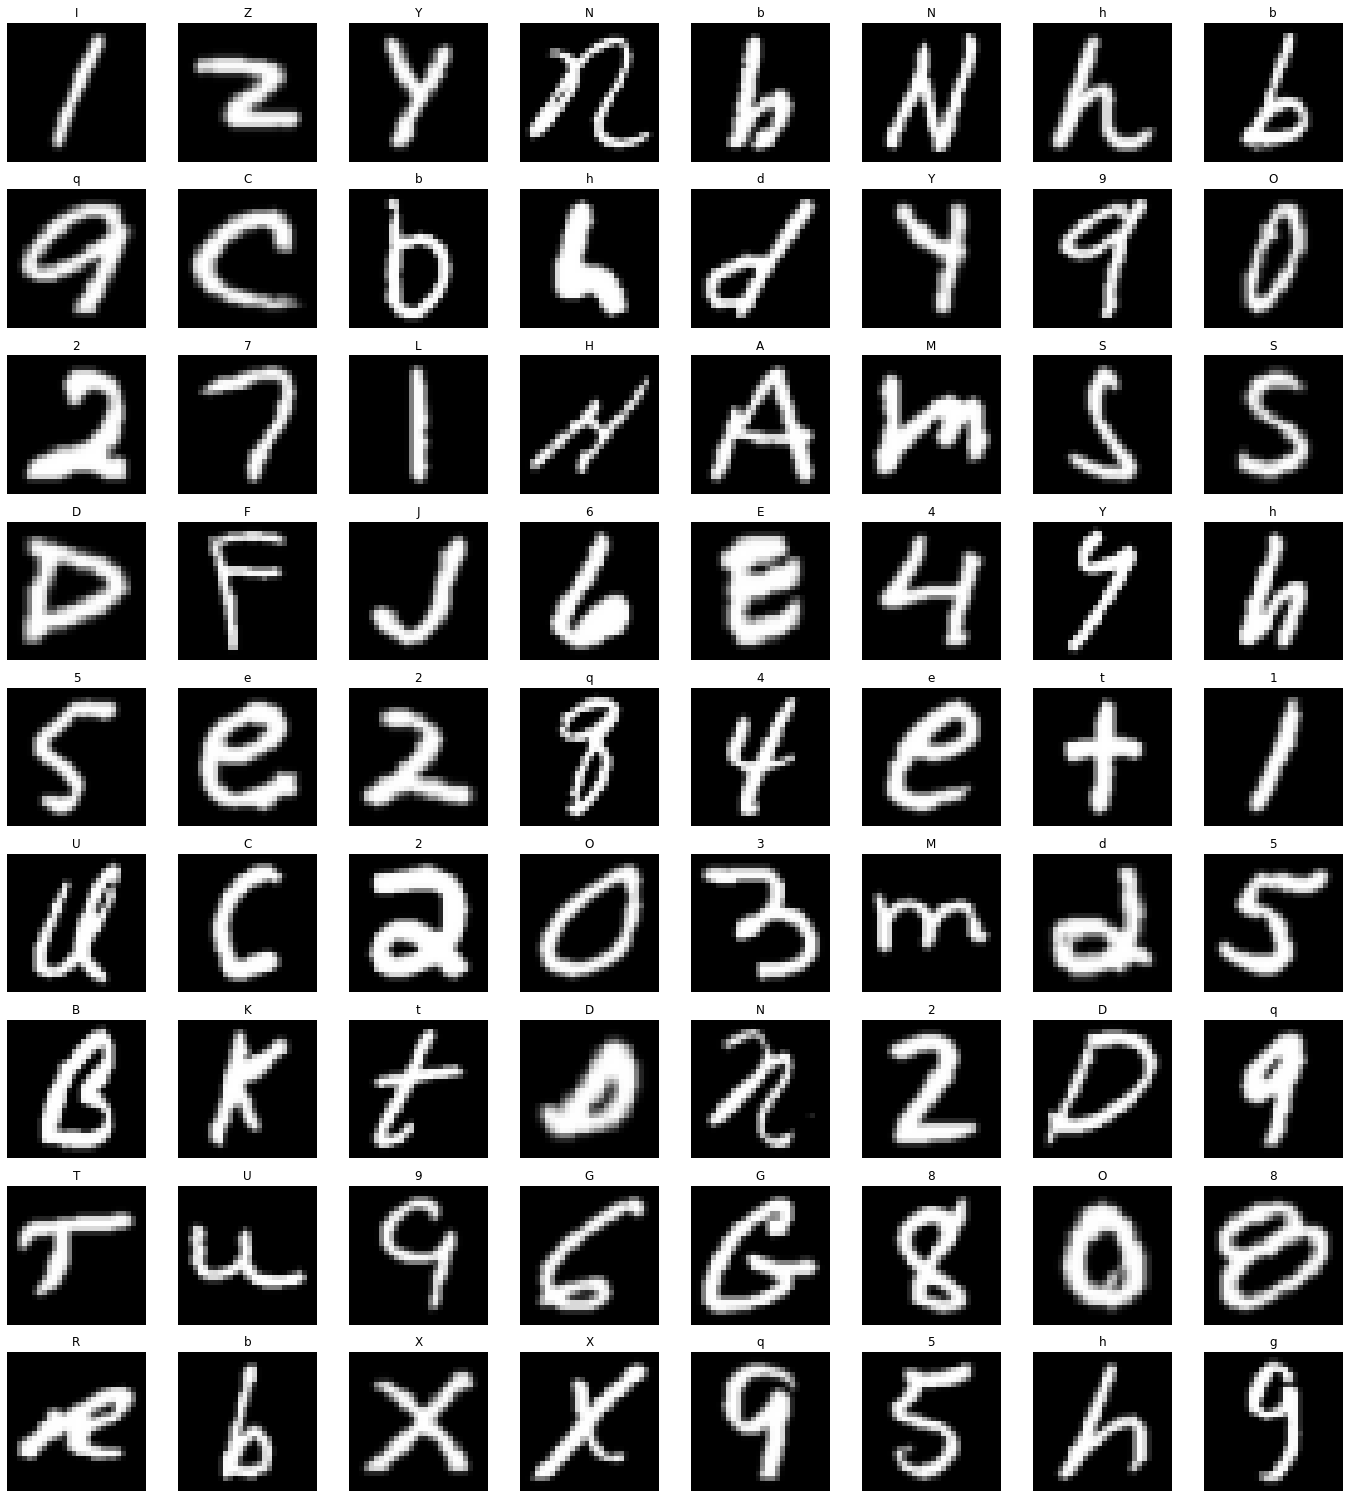

In [ ]:
dls.train.show_batch(max_n=72,nrows=9,ncols=8,cmap="gray")

In [ ]:
# dls.valid.show_batch(,max_n=72,nrows=9,ncols=8,cmap="gray")

# making learner and training the model using transfer learning and interpreting the model using CONFUSION matrix

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 7 x 7     
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                        

In [ ]:
learn.fine_tune(1)

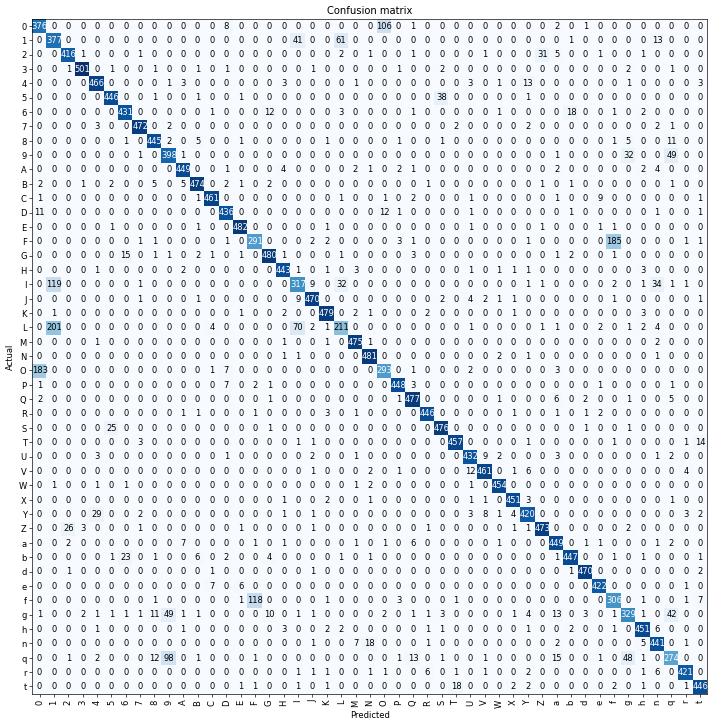

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('L', '1', 201),
 ('F', 'f', 185),
 ('O', '0', 183),
 ('I', '1', 119),
 ('f', 'F', 118),
 ('0', 'O', 106),
 ('q', '9', 98),
 ('L', 'I', 70),
 ('1', 'L', 61),
 ('9', 'q', 49),
 ('g', '9', 49),
 ('q', 'g', 48),
 ('g', 'q', 42),
 ('1', 'I', 41),
 ('5', 'S', 38),
 ('I', 'n', 34),
 ('9', 'g', 32),
 ('I', 'L', 32),
 ('2', 'Z', 31),
 ('Y', '4', 29),
 ('Z', '2', 26),
 ('S', '5', 25),
 ('b', '6', 23),
 ('6', 'b', 18),
 ('n', 'N', 18),
 ('t', 'T', 18),
 ('G', '6', 15),
 ('q', 'a', 15),
 ('T', 't', 14),
 ('1', 'n', 13),
 ('4', 'Y', 13),
 ('g', 'a', 13),
 ('q', 'Q', 13),
 ('6', 'G', 12),
 ('D', 'O', 12),
 ('V', 'U', 12),
 ('q', '8', 12),
 ('8', 'q', 11),
 ('D', '0', 11),
 ('g', '8', 11),
 ('g', 'G', 10),
 ('C', 'e', 9),
 ('I', 'J', 9),
 ('J', 'I', 9),
 ('U', 'V', 9),
 ('0', 'D', 8),
 ('Y', 'V', 8),
 ('O', 'D', 7),
 ('P', 'D', 7),
 ('a', 'A', 7),
 ('e', 'C', 7),
 ('f', 't', 7),
 ('n', 'M', 7),
 ('Q', 'a', 6),
 ('V', 'Y', 6),
 ('a', 'Q', 6),
 ('b', 'B', 6),
 ('e', 'E', 6),
 ('h', 'n', 6),
 ('r', 'R

# with batch size 512

In [ ]:
def get_x(r):
    return r.iloc[2:].to_numpy().reshape(28,28).transpose().astype(np.uint8)

In [ ]:
def get_y(r):
    return r.iloc[0]

In [ ]:
MNIST=DataBlock(
        blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
        get_x=get_x,
        get_y=get_y,
        splitter=ColSplitter(col="is_valid")
 )

In [ ]:
dls=MNIST.dataloaders(df,bs=512)

In [ ]:
list(dls)

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)

In [ ]:
learn.summary()

Sequential (Input shape: 512 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     512 x 64 x 14 x 14  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     512 x 64 x 7 x 7    
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                       

SuggestedLRs(valley=0.001737800776027143)

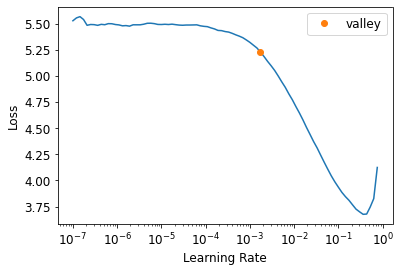

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(10)

KeyboardInterrupt: ignored

# Extracting images from CSV of each class

In [ ]:
show_images

<function fastai.torch_core.show_images>

In [ ]:
doc(show_images)

In [ ]:
images=[]
names=[]

In [ ]:
for i in train_df["45"].unique():
    for j in range(5):
          images.append(train_df.iloc[np.where(train_df["45"]==i)].iloc[j,1:].to_numpy().reshape(28,28).transpose().astype(np.uint8))
          names.append(f"{train_df.iloc[np.where(train_df['45']==i)].iloc[j,0]}_{j}_image")


In [ ]:
len(images),len(names)

(235, 235)

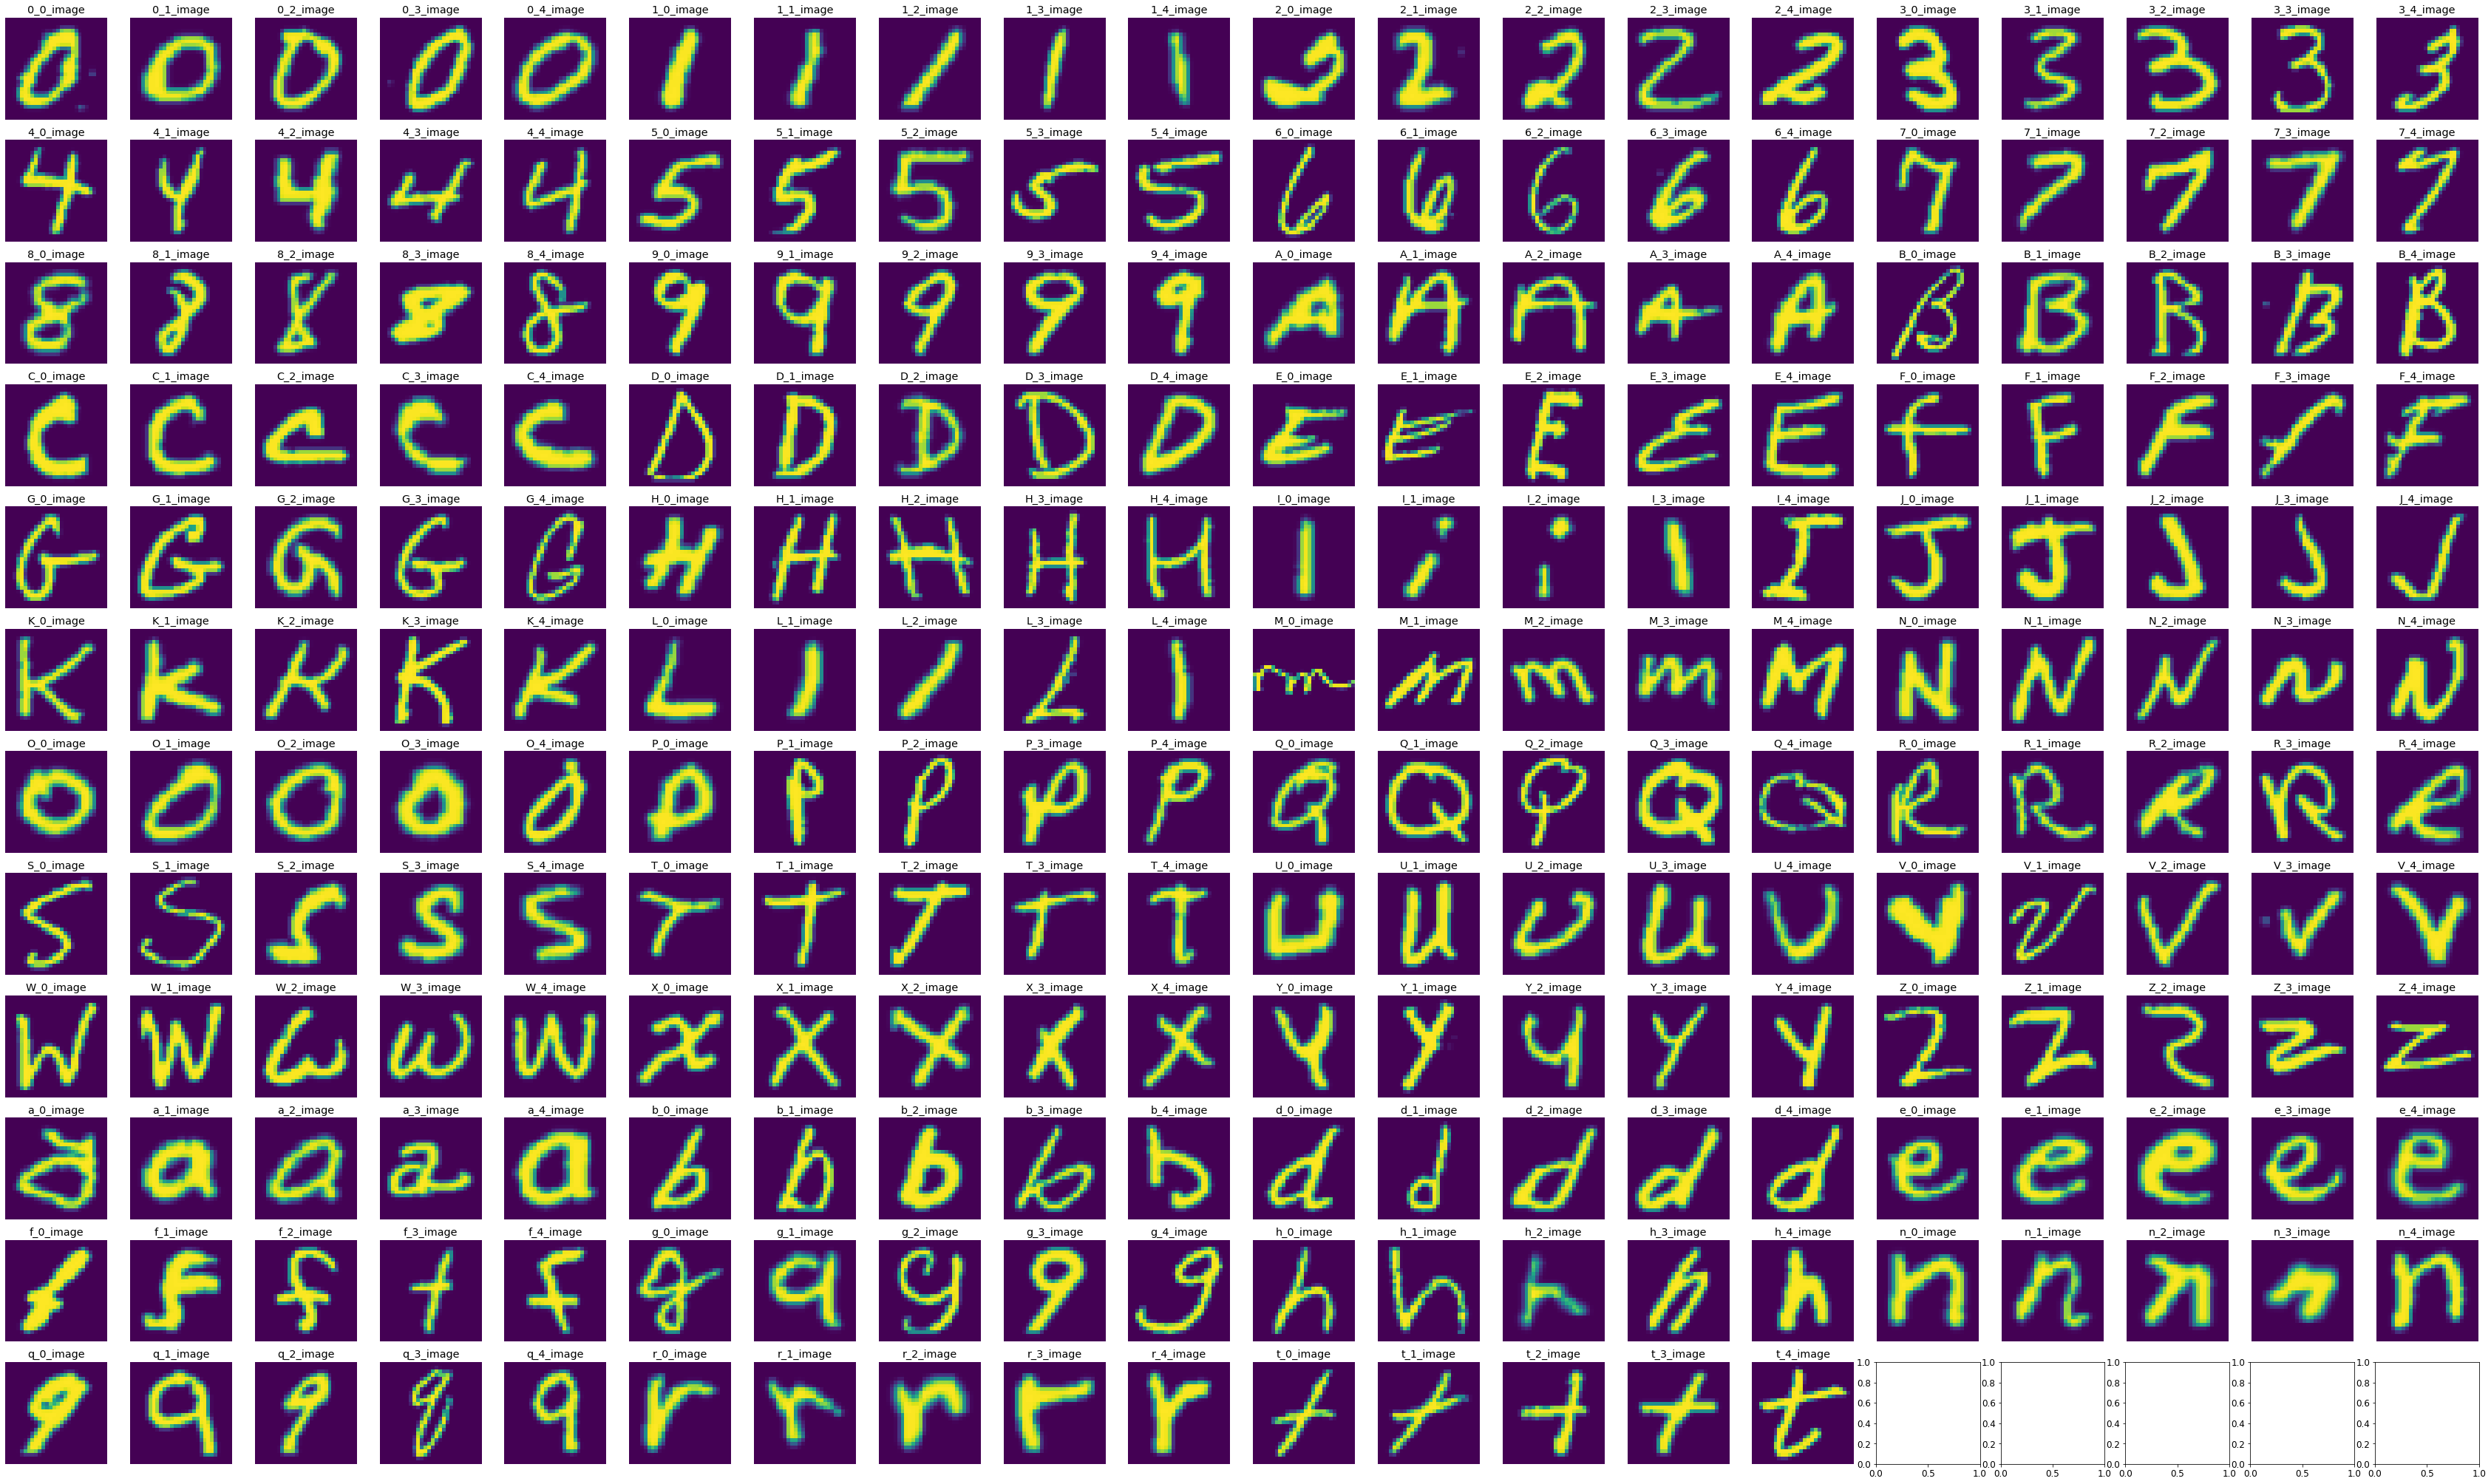

In [ ]:
show_images(images,titles=names,imsize=3,nrows=12,ncols=20)

In [ ]:
train_df.iloc[:,0].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b',
       'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'], dtype=object)

In [ ]:
images_single=[]
names_single=[]

In [ ]:
for i in train_df.iloc[:,0].unique():
        images_single.append(train_df.iloc[np.where(train_df.iloc[:,0]==i)].iloc[0,1:].to_numpy().reshape(28,28).transpose().astype(np.uint8))
        names_single.append(f"{train_df.iloc[np.where(train_df.iloc[:,0]==i)].iloc[0,0]}_{j}_image")


In [ ]:
len(images_single),len(names_single)

(47, 47)

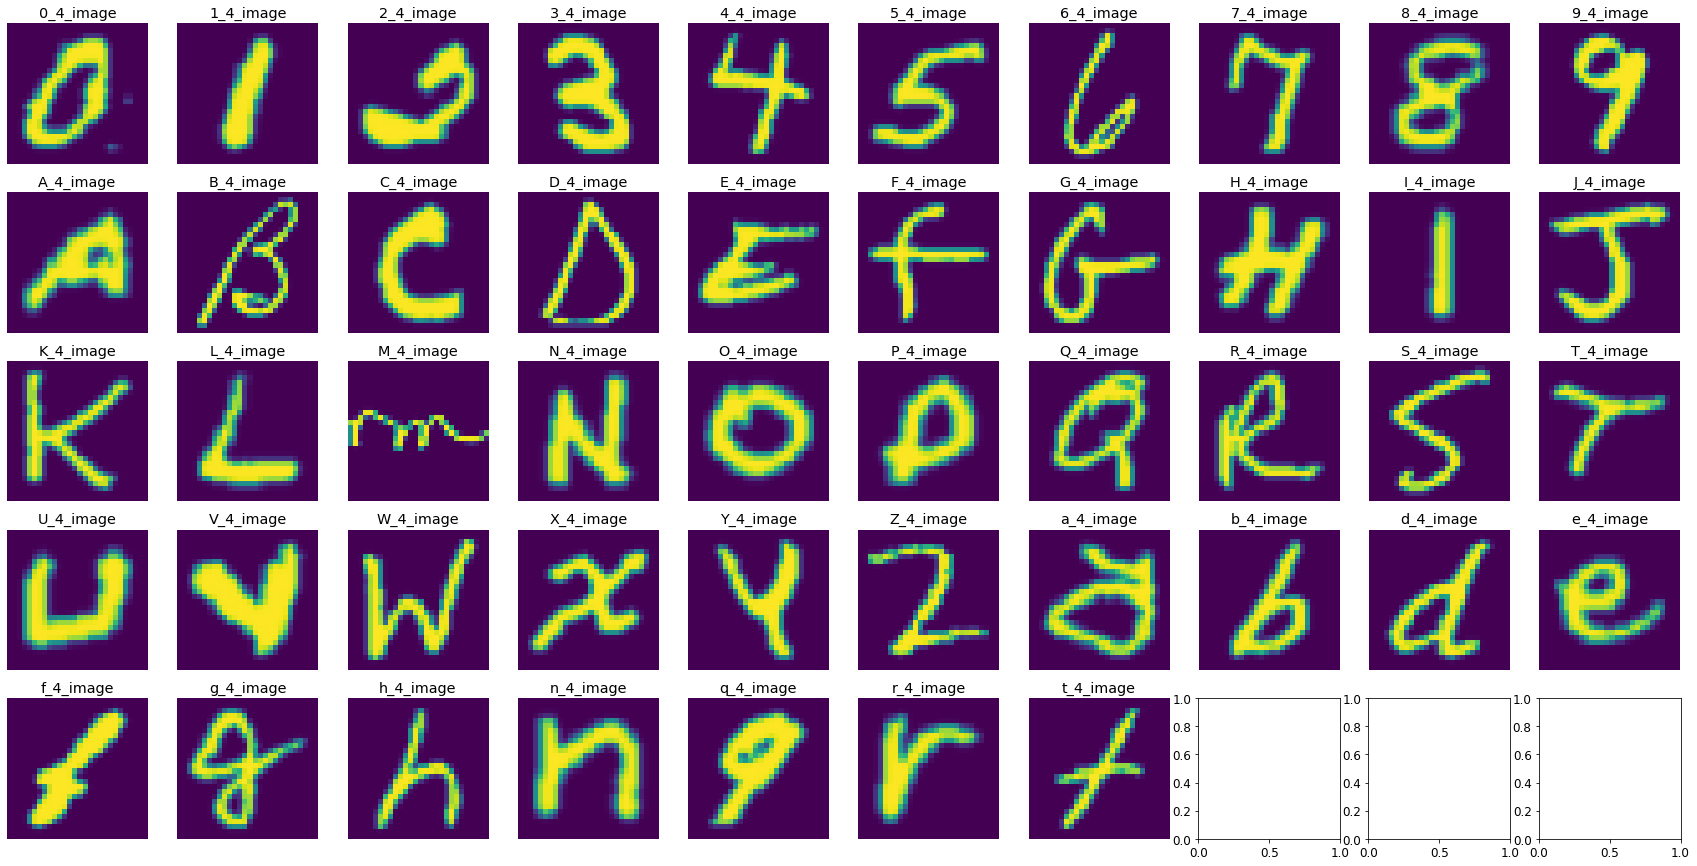

In [ ]:
show_images(images_single,titles=names_single,imsize=3,nrows=5,ncols=10)

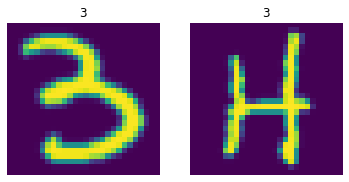

In [ ]:
a_3_image=[tensor(train_df.iloc[np.where(train_df.iloc[:,0]=="3")].iloc[2,1:].to_numpy().reshape(28,28).transpose().astype(np.uint8)),
           train_df.iloc[np.where(train_df.iloc[:,0]=="3")].iloc[2,0]]
a_H_image=[tensor(train_df.iloc[np.where(train_df.iloc[:,0]=="H")].iloc[3,1:].to_numpy().reshape(28,28).transpose().astype(np.uint8)),
           train_df.iloc[np.where(train_df.iloc[:,0]=="3")].iloc[3,0]]

show_images([a_3_image[0],a_H_image[0]],titles=(a_3_image[1],a_H_image[1]))

# exploring KERNEL

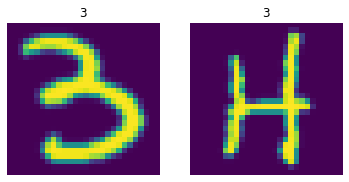

In [ ]:
a_3_image=[tensor(train_df.iloc[np.where(train_df.iloc[:,0]=="3")].iloc[2,1:].to_numpy().reshape(28,28).transpose().astype(np.uint8)),
           train_df.iloc[np.where(train_df.iloc[:,0]=="3")].iloc[2,0]]
a_H_image=[tensor(train_df.iloc[np.where(train_df.iloc[:,0]=="H")].iloc[3,1:].to_numpy().reshape(28,28).transpose().astype(np.uint8)),
           train_df.iloc[np.where(train_df.iloc[:,0]=="3")].iloc[3,0]]

show_images([a_3_image[0],a_H_image[0]],titles=(a_3_image[1],a_H_image[1]))

In [ ]:
df = pd.DataFrame(a_3_image[0])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

In [ ]:
 top_edge = tensor([[-1,-1,-1],
                    [ 0, 0, 0],
                    [ 1, 1, 1]]).float()

In [ ]:
def apply_kernel(image,row, col, kernel):
 return (image[row-1:row+2,col-1:col+2] * kernel).sum()

In [ ]:
apply_kernel(a_3_image[0],2,8,top_edge)

tensor(738.)

In [ ]:
apply_kernel(a_3_image[0],5,8,top_edge)

tensor(-665.)

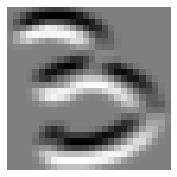

In [ ]:
rng = range(1,27)
top_edge3 = tensor([[apply_kernel(a_3_image[0],i,j,top_edge) for j in rng] for i in rng])
show_image(top_edge3,cmap="binary",figsize=(3,3));

In [ ]:
df = pd.DataFrame(a_H_image[0])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

In [ ]:
apply_kernel(a_H_image[0],14,13,top_edge)

tensor(750.)

In [ ]:
apply_kernel(a_H_image[0],16,13,top_edge)

tensor(-760.)

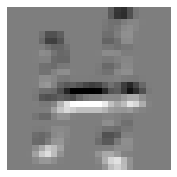

In [ ]:
top_edgeH = tensor([[apply_kernel(a_H_image[0],i,j,top_edge) for j in rng] for i in rng])
show_image(top_edgeH,cmap="binary",figsize=(3,3));

In [ ]:
left_edge = tensor([[-1,1,0],
                    [-1,1,0],
                    [-1,1,0]]).float()
diag1_edge = tensor([[ 0,-1, 1],
                     [-1, 1, 0],
                     [ 1, 0, 0]]).float()
diag2_edge = tensor([[ 1,-1, 0],
                    [ 0, 1,-1],
                    [ 0, 0, 1]]).float()


In [ ]:
top_edge3 = tensor([[apply_kernel(a_3_image[0],i,j,top_edge) for j in rng] for i in rng])
left_edge3 =tensor([[apply_kernel(a_3_image[0],i,j,left_edge) for j in rng] for i in rng])
diag1_edge3 =tensor([[apply_kernel(a_3_image[0],i,j,diag1_edge) for j in rng] for i in rng])
diag2_edge3 =tensor([[apply_kernel(a_3_image[0],i,j,diag2_edge) for j in rng] for i in rng])

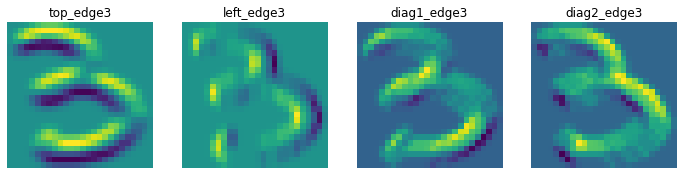

In [ ]:
show_images([top_edge3,left_edge3,diag1_edge3,diag2_edge3],titles=("top_edge3","left_edge3","diag1_edge3","diag2_edge3"))

In [ ]:
top_edgeH = tensor([[apply_kernel(a_H_image[0],i,j,top_edge) for j in rng] for i in rng])
left_edgeH =tensor([[apply_kernel(a_H_image[0],i,j,left_edge) for j in rng] for i in rng])
diag1_edgeH =tensor([[apply_kernel(a_H_image[0],i,j,diag1_edge) for j in rng] for i in rng])
diag2_edgeH =tensor([[apply_kernel(a_H_image[0],i,j,diag2_edge) for j in rng] for i in rng])

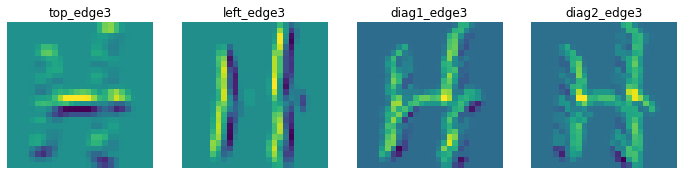

In [ ]:
show_images([top_edgeH,left_edgeH,diag1_edgeH,diag2_edgeH],titles=("top_edge3","left_edge3","diag1_edge3","diag2_edge3"))

In [ ]:
# show_image(top_edgeH,cmap="binary",figsize=(3,3));
# show_image(left_edgeH,cmap="binary",figsize=(3,3));
# show_image(diag1_edgeH,cmap="binary",figsize=(3,3));
# show_image(diag2_edgeH,cmap="binary",figsize=(3,3));

# CNN from scratch

In [ ]:
def get_x(r):
    return r.iloc[1:].to_numpy().reshape(28,28).transpose().astype(np.uint8)

In [ ]:
def get_y(r):
    return r.iloc[0]

In [ ]:
dblock=DataBlock(
        blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
        get_x=get_x,
        get_y=get_y
)

In [ ]:
dls=dblock.dataloaders(train_df)

Could not do one pass in your dataloader, there is something wrong in it


In [ ]:
broken_cnn = sequential(
 nn.Conv2d(1,30, kernel_size=3, padding=1),
 nn.ReLU(),
 nn.Conv2d(30,1, kernel_size=3, padding=1)
)

In [ ]:
# broken_cnn(a_3_image[0]).shape

In [ ]:
simple_net = nn.Sequential(
 nn.Linear(28*28,30),
 nn.ReLU(),
 nn.Linear(30,1)
)

In [ ]:
learn=Learner(dls,simple_net,loss_func=F.cross_entropy,metrics=accuracy)

In [ ]:
learn.fit(1)

RuntimeError: ignored

In [ ]:
len(dls.vocab)

47

In [ ]:
def conv(ni, nf, ks=3, act=True):
      res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
      if act: res = nn.Sequential(res, nn.ReLU())
      return res

In [ ]:
def simple_cnn():
    return sequential(
            conv(1 ,4),  #14x14
            conv(4 ,8),  #7x7
            conv(8 ,16), #4x4
            conv(16,32), #2x2
            conv(32,47, act=False), #1x1
            Flatten(),
)


In [ ]:
learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy, metrics=accuracy)

In [ ]:
learn.summary()

RuntimeError: ignored

In [ ]:
learn.fit_one_cycle(2, 0.01)

RuntimeError: ignored

In [ ]:
CUDA_LAUNCH_BLOCKING=1

In [ ]:
def get_dls(bs=64):
  return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
        get_x=get_x,
        get_y=get_y,
        batch_tfms=Normalize()
  ).dataloaders(train_df, bs=bs)

In [ ]:
dls = get_dls()

In [ ]:
list(dls)

In [ ]:
x,y=dls.one_batch()

In [ ]:
x.shape

torch.Size([64, 1, 28, 28])

In [ ]:
def conv(ni, nf, ks=3, act=True):
 res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
 if act: res = nn.Sequential(res, nn.ReLU())
 return res

In [ ]:
def simple_cnn():
 return sequential(
 conv(1 ,8, ks=5), #14x14
 conv(8 ,16), #7x7
 conv(16,32), #4x4
 conv(32,64), #2x2
 conv(64,10, act=False), #1x1
 Flatten(),
 )


In [ ]:
from fastai.callback.hook import *

In [ ]:
def fit(epochs=1):
 learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
 metrics=accuracy, cbs=ActivationStats(with_hist=True))
 learn.fit(epochs, 0.06)
 return learn

In [ ]:
learn = fit()

/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


RuntimeError: ignored

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)

RuntimeError: ignored

In [ ]:
learn.fine_tune(1)

RuntimeError: ignored

In [ ]:
learn=cnn_learner(dls,resnet34)

RuntimeError: ignored

In [ ]:
learn.fine_tune(1)

RuntimeError: ignored

# ANother attempt fot CNN from scratch

In [ ]:
def get_x(r):
    return r.iloc[2:].to_numpy().reshape(28,28).transpose().astype(np.uint8)

In [ ]:
def get_y(r):
    return r.iloc[0]

In [ ]:
MNIST=DataBlock(
        blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
        get_x=get_x,
        get_y=get_y,
        splitter=ColSplitter(col="is_valid")
 )

In [ ]:
dls=MNIST.dataloaders(df)

KeyboardInterrupt: ignored

In [ ]:
def conv(ni, nf, ks=3, act=True):
      res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
      if act: res = nn.Sequential(res, nn.ReLU())
      return res

In [ ]:
def simple_cnn():
    return sequential(
            conv(1 ,4),  #14x14
            conv(4 ,8),  #7x7
            conv(8 ,16), #4x4
            conv(16,32), #2x2
            conv(32,47, act=False), #1x1
            Flatten(),
)


In [ ]:
learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy, metrics=accuracy)

In [ ]:
learn.summary()

Sequential (Input shape: 64 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 4 x 14 x 14    
Conv2d                                    40         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 8 x 7 x 7      
Conv2d                                    296        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 4 x 4     
Conv2d                                    1168       True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 2 x 2     
Conv2d                                    4640       True      
ReLU                                          

In [ ]:
learn.fit_one_cycle(2, 0.01)

In [ ]:
def simple_cnn():
    return sequential(
            conv(1 ,16,ks=5),  #14x14
            conv(16 ,32),  #7x7
            conv(32 ,64), #4x4
            conv(64,128), #2x2
            conv(128,47, act=False), #1x1
            Flatten(),
)

In [ ]:
learn.fit_one_cycle(1, 0.06)

In [ ]:
dls=dblock.dataloaders(train_df,batch_size=512)

In [ ]:
learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(1, 0.06)

# BatchNormalization

In [ ]:
def get_dls(bs=64):
 return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
        get_x=get_x,
        get_y=get_y,
        batch_tfms=Normalize()
 ).dataloaders(df, bs=bs)

In [ ]:
dls=get_dls(512)

In [ ]:
def conv(ni, nf, ks=3, act=True):
 layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
 layers.append(nn.BatchNorm2d(nf))
 if act: layers.append(nn.ReLU())
 return nn.Sequential(*layers)

In [ ]:
def simple_cnn():
    return sequential(
            conv(1 ,16,ks=5),  #14x14
            conv(16 ,32),  #7x7
            conv(32 ,64), #4x4
            conv(64,128), #2x2
            conv(128,47, act=False), #1x1
            Flatten(),
)

In [ ]:
from fastai.callback.hook import *

In [ ]:
learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy, metrics=accuracy)

In [ ]:
learn.summary()

Sequential (Input shape: 512 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     512 x 16 x 14 x 14  
Conv2d                                    416        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     512 x 32 x 7 x 7    
Conv2d                                    4640       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     512 x 64 x 4 x 4    
Conv2d                                    18496      True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________

In [ ]:
learn.fit_one_cycle(10,lr_max=0.1)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f216700f290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f216700f290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

# Residual neural network

In [ ]:
def get_x(r):
    return r.iloc[1:].to_numpy().reshape(28,28).transpose().astype(np.uint8)

In [ ]:
def get_y(r):
    return r.iloc[0]

In [ ]:
def get_dls(bs=64):
 return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
        get_x=get_x,
        get_y=get_y,
        batch_tfms=Normalize()
 ).dataloaders(train_df, bs=bs)

In [ ]:
dls=get_dls(512)

In [ ]:
def block(ni, nf): return ConvLayer(ni, nf, stride=2)

In [ ]:
doc(ConvLayer)

In [ ]:
def get_model():
 return nn.Sequential(
 block(1, 16),
 block(16, 32),
 block(32, 64),
 block(64, 128),
 block(128, 256),
 nn.AdaptiveAvgPool2d(1),
 Flatten(),
 nn.Linear(256, dls.c))

In [ ]:
learn=Learner(dls,get_model(), loss_func=nn.CrossEntropyLoss(), metrics=accuracy).to_fp16()


NameError: ignored

In [ ]:
learn.lr_find()

NameError: ignored

In [ ]:
learn.fit_one_cycle(5, 3e-3)

In [ ]:
def _conv_block(ni,nf,stride):
      return nn.Sequential(
            ConvLayer(ni, nf, stride=stride),
            ConvLayer(nf, nf, act_cls=None, norm_type=NormType.BatchZero))

In [ ]:
class ResBlock(Module):
      def __init__(self, ni, nf, stride=1):
            self.convs = _conv_block(ni,nf,stride)
            self.idconv = noop if ni==nf else ConvLayer(ni, nf, 1, act_cls=None)
            self.pool = noop if stride==1 else nn.AvgPool2d(2, ceil_mode=True)
      def forward(self, x):
            return F.relu(self.convs(x) + self.idconv(self.pool(x)))

In [ ]:
doc(ResBlock)

In [ ]:
def block(ni, nf):
 return nn.Sequential(ResBlock(ni=ni, nf=nf, stride=2), ResBlock(ni=nf, nf=nf))


In [ ]:
def get_model():
 return nn.Sequential(
 block(1, 16),
 block(16, 32),
 block(32, 64),
 block(64, 128),
 block(128, 256),
 nn.AdaptiveAvgPool2d(1),
 Flatten(),
 nn.Linear(256, dls.c))

In [ ]:
learn=Learner(dls,get_model(), loss_func=nn.CrossEntropyLoss(), metrics=accuracy).to_fp16()

SuggestedLRs(valley=0.0014454397605732083)

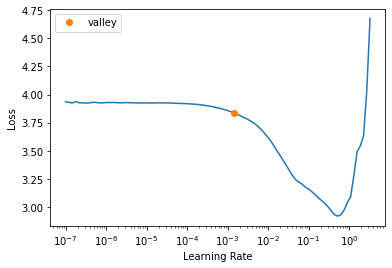

In [ ]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(10, 3e-3)

# Cleaner

In [ ]:
from fastai.vision.widgets import *

In [ ]:
cleaner = ImageClassifierCleaner(learn)

FileNotFoundError: ignored

In [ ]:
cleaner

NameError: ignored